### **1. Load the dataset in Jupyter Notebook using pandas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Dataset (1).csv")

# Display the first few rows of the dataset
df.head()


,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14.00,30.00,E2,-20.79,13.16,42.86,No,No,Female,Agency,7.0,ERS,Noida,34.00,Joined
1,2,2112635,No,18.00,30.00,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8.0,INFRA,Chennai,34.00,Joined
2,3,2112838,No,3.00,45.00,E2,42.84,42.84,0.00,No,No,Male,Agency,4.0,INFRA,Noida,27.00,Joined
3,4,2115021,No,26.00,30.00,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4.0,INFRA,Noida,34.00,Joined
4,5,2115125,Yes,1.00,120.00,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6.0,INFRA,Noida,34.00,Joined


In [2]:
import numpy as np

# Replace empty strings or spaces with NaN
df['Duration to accept offer'] = df['Duration to accept offer'].replace(' ', np.nan)
df['Notice period'] = df['Notice period'].replace(' ', np.nan)
df['Age'] = df['Age'].replace(' ', np.nan)


# Now try converting to float
df['Duration to accept offer'] = df['Duration to accept offer'].astype(float)
df['Notice period'] = df['Notice period'].astype(float)
df['Age'] = df['Age'].astype(float)

In [3]:
df.dtypes

SLNO                             int64
Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer       float64
Notice period                  float64
Offered band                    object
Pecent hike expected in CTC     object
Percent hike offered in CTC     object
Percent difference CTC          object
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                     float64
LOB                             object
Location                        object
Age                            float64
Status                          object
dtype: object

In [4]:
# Convert columns to numeric, setting errors='coerce' to turn non-numeric values into NaN
df['Pecent hike expected in CTC'] = pd.to_numeric(df['Pecent hike expected in CTC'], errors='coerce')
df['Percent hike offered in CTC'] = pd.to_numeric(df['Percent hike offered in CTC'], errors='coerce')
df['Percent difference CTC'] = pd.to_numeric(df['Percent difference CTC'], errors='coerce')

# Fill NaN values with the mean of the column
df['Pecent hike expected in CTC'] = df['Pecent hike expected in CTC'].fillna(df['Pecent hike expected in CTC'].mean())
df['Percent hike offered in CTC'] = df['Percent hike offered in CTC'].fillna(df['Percent hike offered in CTC'].mean())
df['Percent difference CTC'] = df['Percent difference CTC'].fillna(df['Percent difference CTC'].mean())


In [5]:
# Summarize the number of null values in each column
null_summary = df.isnull().sum()

# Display the summary
print(null_summary)


SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       4
Notice period                  3
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            2
Status                         0
dtype: int64


In [6]:
df.describe()

,SLNO,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,8995.000000,8.995000e+03,8991.000000,8992.000000,8995.000000,8995.000000,8995.000000,8995.000000,8993.000000
mean,5970.984325,2.843647e+06,21.434768,39.291593,43.868558,40.666311,-1.600444,4.239022,29.913933
std,3373.963454,4.863448e+05,25.809203,22.223567,29.778215,36.052575,19.493676,2.547571,4.097990
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,3207.500000,2.386476e+06,3.000000,30.000000,27.270000,22.200000,-8.330000,3.000000,27.000000
50%,5976.000000,2.807482e+06,10.000000,30.000000,40.000000,36.080000,0.000000,4.000000,29.000000
75%,8739.000000,3.300060e+06,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000


### **2. Build a correlation matrix between all the numeric features in the dataset.Report the features, which are correlated at a cut-off of 0.70. What actions will you take on the features, which are highly correlated?**

In [7]:
# Get the list of numerical feature labels
numerical_features = df.select_dtypes(include=[np.number]).columns

# Display the numerical feature labels
print(numerical_features)


Index(['SLNO', 'Candidate Ref', 'Duration to accept offer', 'Notice period',
       'Pecent hike expected in CTC', 'Percent hike offered in CTC',
       'Percent difference CTC', 'Rex in Yrs', 'Age'],
      dtype='object')


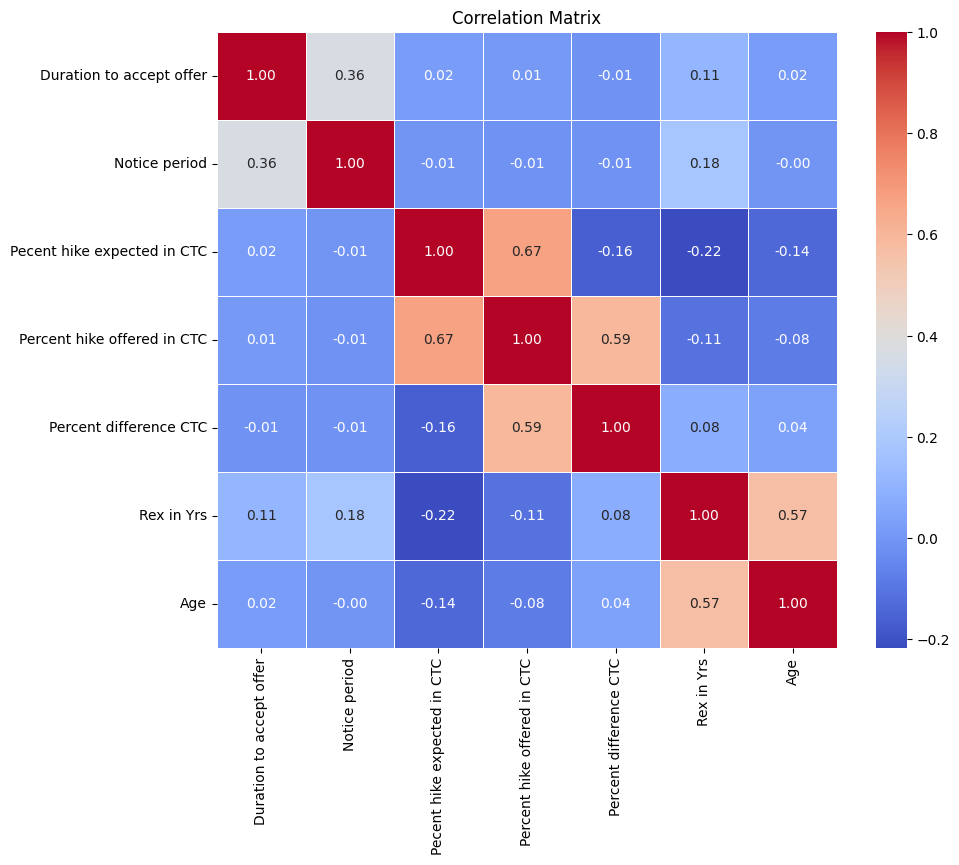

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Duration to accept offer', 'Notice period',
                         'Pecent hike expected in CTC', 'Percent hike offered in CTC',
                         'Percent difference CTC', 'Rex in Yrs', 'Age']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Highest Correlated Values are Percent Hike Offered in CTC and Percent Hike Expected in CTC with correlation of 0.67.

Actions on Highly Correlated Features:
Feature Elimination:

If two features are highly correlated, we might consider removing one of them to reduce redundancy. Keeping both can lead to multicollinearity in some models, which can affect model performance.
Dimensionality Reduction:
Instead of removing, We can also apply dimensionality reduction techniques like Principal Component Analysis (PCA) to combine correlated features into a single component.
Regularization Techniques:
If we want to keep all features, consider using regularization techniques like Lasso or Ridge regression, which can handle multicollinearity by penalizing large coefficients.

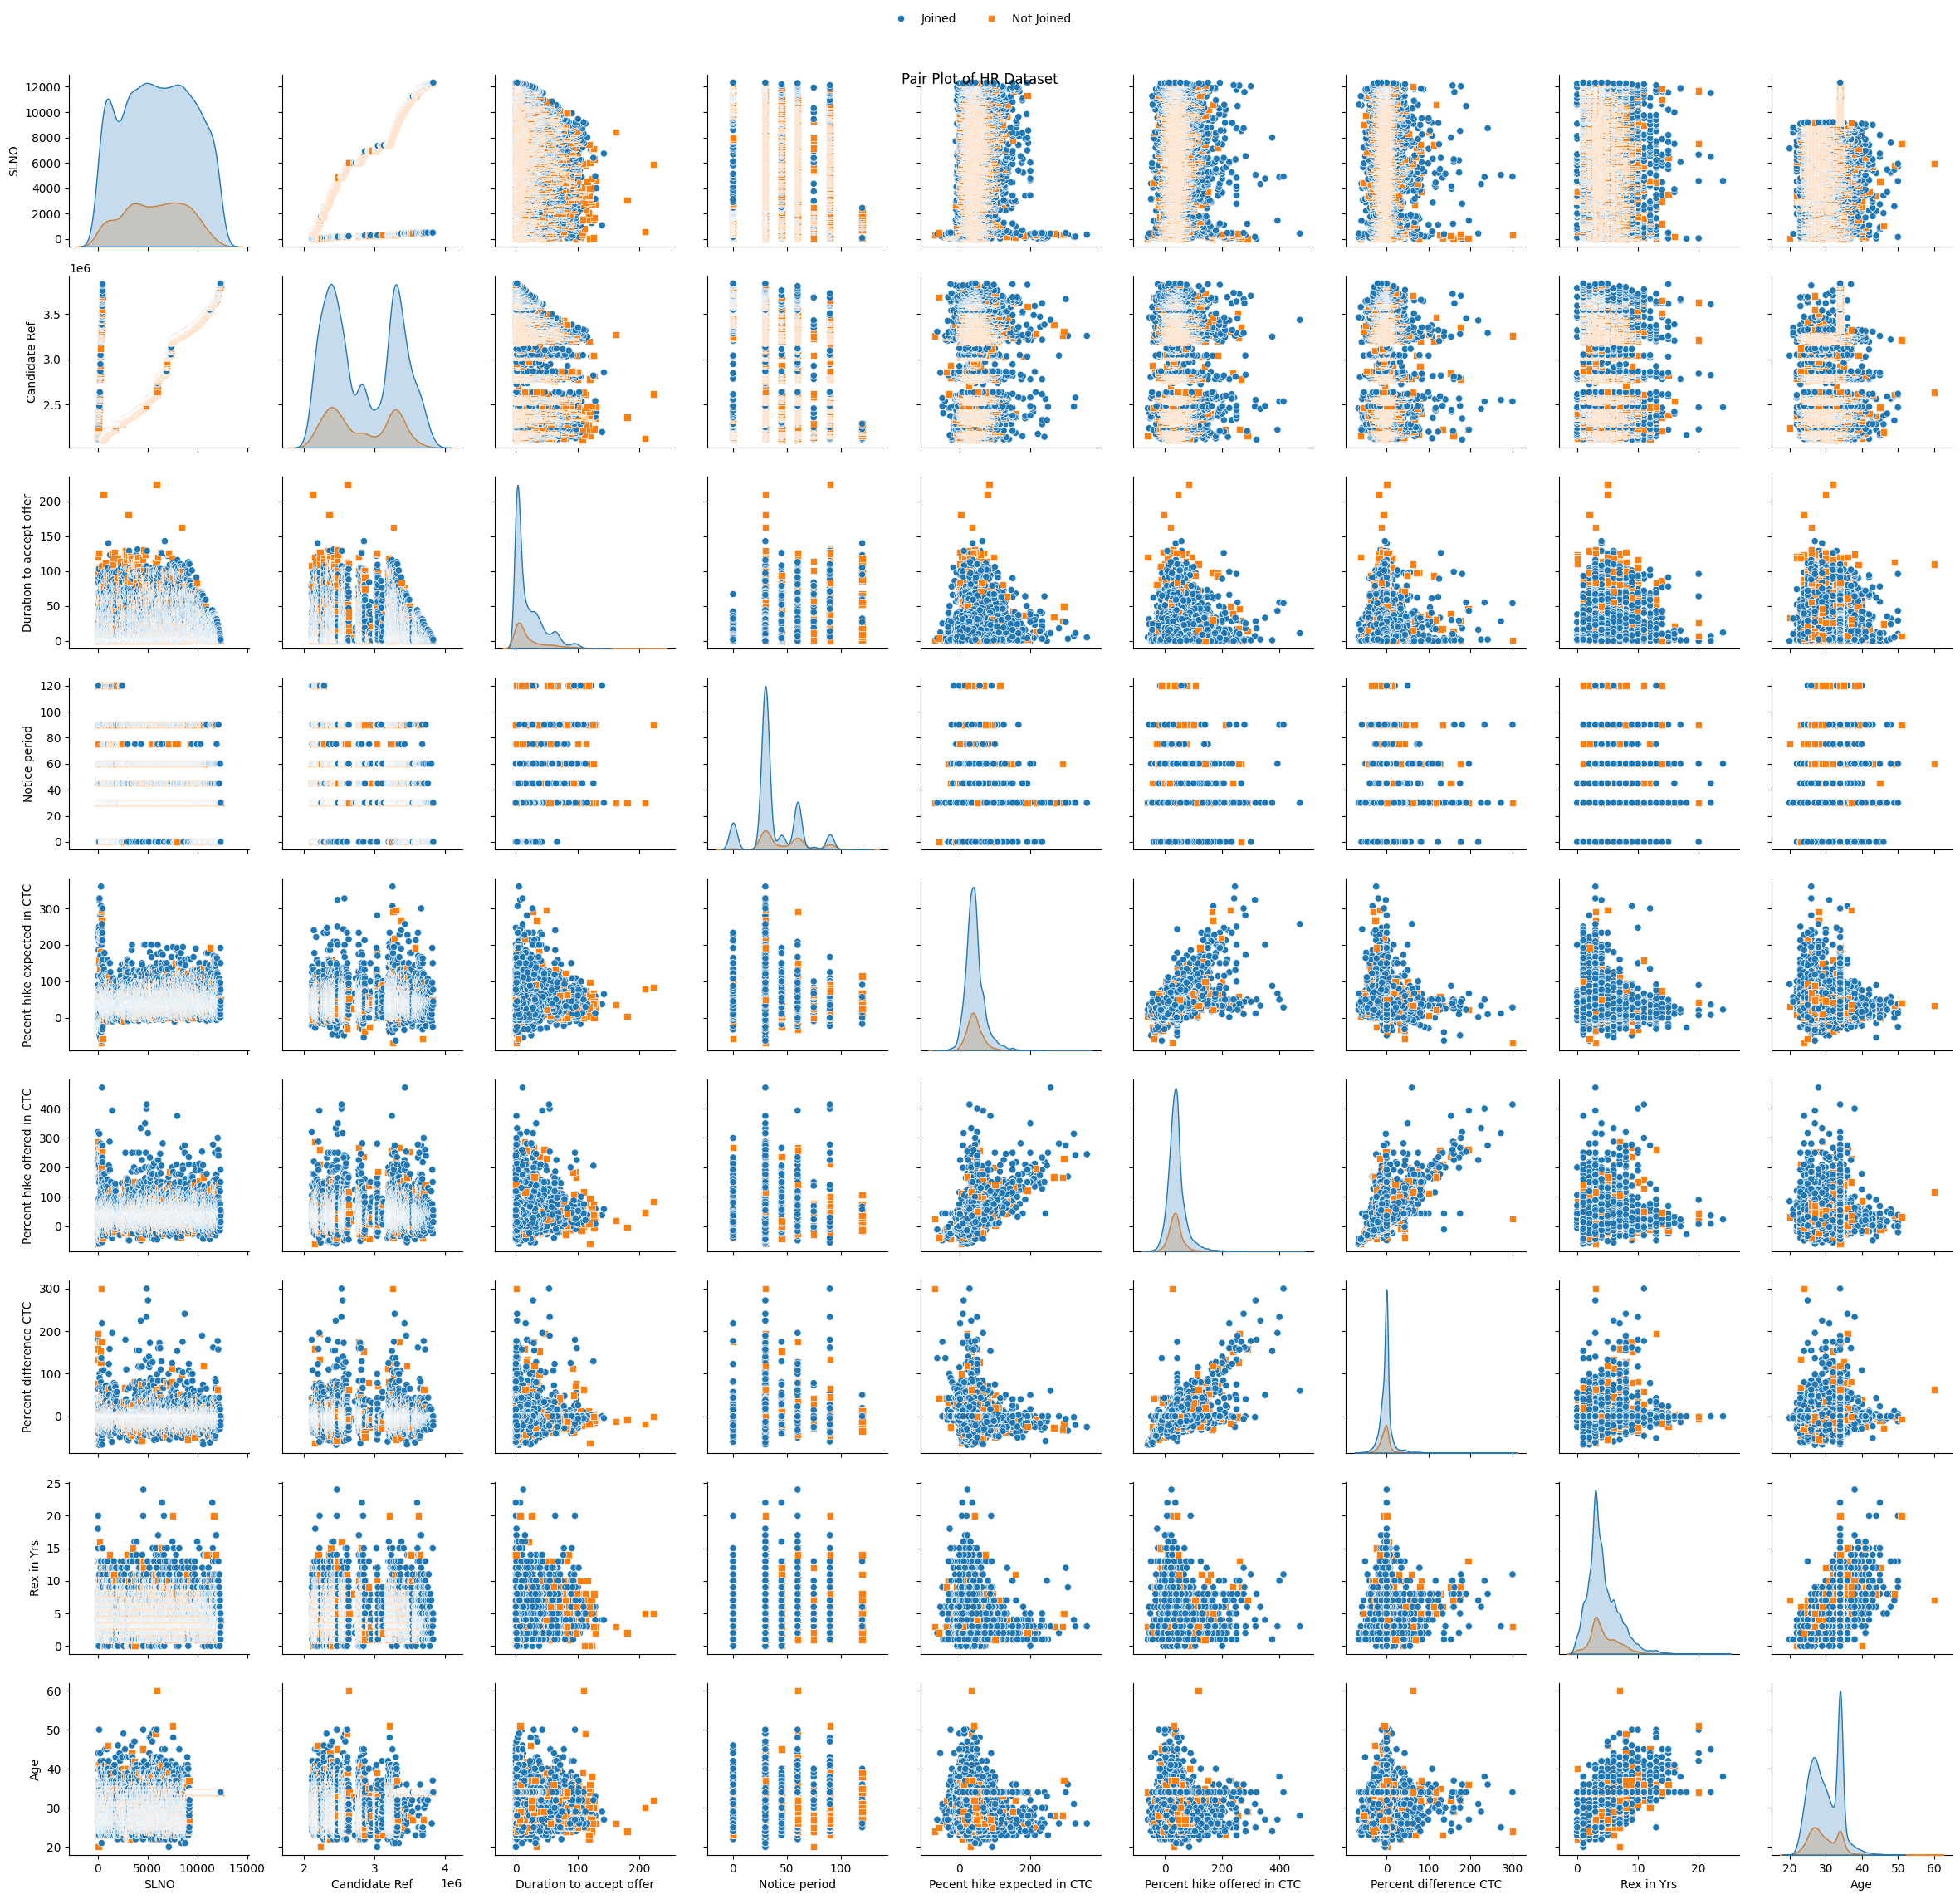

In [9]:
import seaborn as sns
ax = sns.pairplot(data=df,hue='Status', markers=["o", "s"])
plt.suptitle("Pair Plot of HR Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

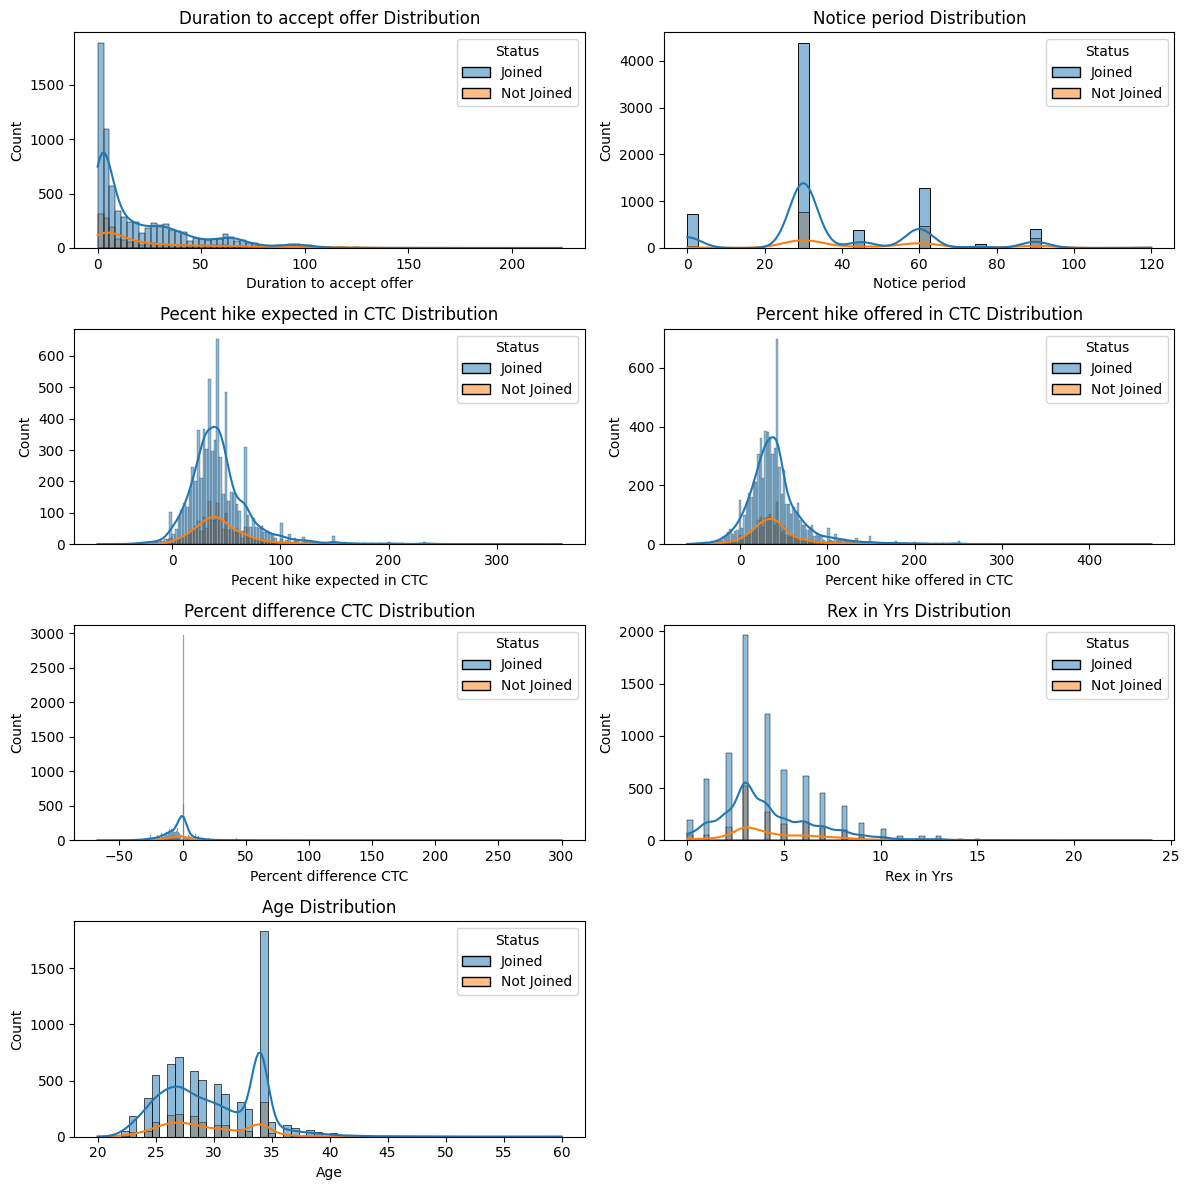

In [10]:
cols = ['Duration to accept offer',	'Notice period','Pecent hike expected in CTC',	'Percent hike offered in CTC',	'Percent difference CTC','Rex in Yrs','Age']
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 12))
for i, feature in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data=df, x=feature, hue='Status', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

In [11]:
df['Status'] = df['Status'].replace({'Joined': 1, 'Not Joined': 0})


C:\Users\haris\AppData\Local\Temp\ipykernel_13616\1064645211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status'] = df['Status'].replace({'Joined': 1, 'Not Joined': 0})


### **3. Build a new feature named LOB_Hike_Offered using LOB and percentage hike offered. Include this as a part of the data frame created in step 1. What assumption are you trying to test with such variables?**

In [12]:
df['LOB_Hike_Offered'] = df['LOB'] + '_' + df['Percent hike offered in CTC'].astype(str)


In [13]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status,LOB_Hike_Offered
0,1,2110407,Yes,14.0,30.0,E2,-20.79,13.16,42.86,No,No,Female,Agency,7.0,ERS,Noida,34.0,1,ERS_13.16
1,2,2112635,No,18.0,30.0,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8.0,INFRA,Chennai,34.0,1,INFRA_320.0
2,3,2112838,No,3.0,45.0,E2,42.84,42.84,0.00,No,No,Male,Agency,4.0,INFRA,Noida,27.0,1,INFRA_42.84
3,4,2115021,No,26.0,30.0,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4.0,INFRA,Noida,34.0,1,INFRA_42.84
4,5,2115125,Yes,1.0,120.0,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6.0,INFRA,Noida,34.0,1,INFRA_42.59


In [14]:
df.value_counts(['Status'])

Status
1         7313
0         1682
Name: count, dtype: int64

The new feature LOB_Hike_Offered tests the assumption that the hike offered for a particular line of business (LOB) has a significant impact on the outcome variable. By creating this feature, you can examine whether the combination of LOB and the percentage hike offered influences the target variable, such as whether a candidate joins the company or not.

### **4. Create a new data frame with the numeric features and categorical features as dummy variable coded features. Which features will you include for model building and why?**

In [15]:
labels=df.columns
print(labels)

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status',
       'LOB_Hike_Offered'],
      dtype='object')


Feautures That will be included for model building are 'DOJ Extended', 'Duration to accept offer', 'Notice period', 'Offered band', 'Pecent hike expected in CTC','Percent hike offered in CTC', 'Percent difference CTC','Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age'. All the Variables have a impact in deciding the candidates preference.

In [16]:
df.drop(columns=['SLNO','Candidate Ref','LOB_Hike_Offered'],inplace=True)

In [17]:
# Convert categorical variables into dummy/indicator variables
df_dummies = pd.get_dummies(df,drop_first=True)


# Display the first few rows of the updated DataFrame
df_dummies.head()


,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Status,DOJ Extended_Yes,Offered band_E0,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,14.0,30.0,-20.79,13.16,42.86,7.0,34.0,1,True,False,...,False,False,False,False,False,False,False,True,False,False
1,18.0,30.0,50.00,320.00,180.00,8.0,34.0,1,False,False,...,False,True,False,False,False,False,False,False,False,False
2,3.0,45.0,42.84,42.84,0.00,4.0,27.0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,26.0,30.0,42.84,42.84,0.00,4.0,34.0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1.0,120.0,42.59,42.59,0.00,6.0,34.0,1,True,False,...,False,False,False,False,False,False,False,True,False,False


In [18]:
df_dummies = df_dummies.dropna()


In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df_dummies.drop('Status', axis=1)
y = df_dummies['Status']

from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
y.value_counts()

Status
1    7305
0    7305
Name: count, dtype: int64

### **5. Split the data into training set and test set. Use 80% of data for model training and 20% for model testing.**

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(df_dummies.columns)

Index(['Duration to accept offer', 'Notice period',
       'Pecent hike expected in CTC', 'Percent hike offered in CTC',
       'Percent difference CTC', 'Rex in Yrs', 'Age', 'Status',
       'DOJ Extended_Yes', 'Offered band_E0', 'Offered band_E1',
       'Offered band_E2', 'Offered band_E3', 'Joining Bonus_No',
       'Joining Bonus_Yes', 'Candidate relocate actual_No',
       'Candidate relocate actual_Yes', 'Gender_Female', 'Gender_Male',
       'Candidate Source_Agency', 'Candidate Source_Direct',
       'Candidate Source_Employee Referral', 'LOB_AXON', 'LOB_BFSI',
       'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare',
       'LOB_INFRA', 'LOB_MMS', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Cochin', 'Location_Gurgaon',
       'Location_Hyderabad', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Noida', 'Location_Others', 'Location_Pune'],
      dtype='object')


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model using the balanced dataset
model.fit(X, y)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Get the coefficients of the model
coefficients = model.coef_[0]
features = X.columns

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

print("\nFeature Coefficients:")
print(coef_df)



Confusion Matrix:
[[1157  298]
 [ 289 1178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1455
           1       0.80      0.80      0.80      1467

    accuracy                           0.80      2922
   macro avg       0.80      0.80      0.80      2922
weighted avg       0.80      0.80      0.80      2922


Feature Coefficients:
                               Feature  Coefficient
0             Duration to accept offer     0.004409
1                        Notice period    -0.012674
2          Pecent hike expected in CTC     0.001686
3          Percent hike offered in CTC     0.005351
4               Percent difference CTC    -0.000090
5                           Rex in Yrs    -0.211960
6                                  Age     0.334844
7                     DOJ Extended_Yes    -0.514626
8                      Offered band_E0    -0.684236
9                      Offered band_E1    -0.757630
10       

C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **6. Build a model using Gender and Age as independent variable and Status as dependent variable.**


• Are Gender and Age a significant feature in this model?

• What inferences can be drawn from this model?

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df_dummies[['Gender_Female', 'Gender_Male', 'Age']]
y = df_dummies['Status']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after SMOTE
y_train_smote.value_counts()


Status
1    5825
0    5825
Name: count, dtype: int64

Without SMOTE

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[  46  449]
 [  28 2173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.09      0.16       495
           1       0.83      0.99      0.90      2201

    accuracy                           0.82      2696
   macro avg       0.73      0.54      0.53      2696
weighted avg       0.79      0.82      0.77      2696



C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With SMOTE

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model using the SMOTE-balanced training data
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#


Confusion Matrix:
[[180 138]
 [719 761]]

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.57      0.30       318
           1       0.85      0.51      0.64      1480

    accuracy                           0.52      1798
   macro avg       0.52      0.54      0.47      1798
weighted avg       0.73      0.52      0.58      1798



The Variables Gender and Age are one of the signifacnt feautures in the model. The Models that they have significantly higher Precision and recall Value on Joined they contribute well along with other Variables. 


### **7. Build a model with statsmodel.api to predict the probability of Not Joining. How do you interpret the model outcome? Report the model performance on the test set.**

In [25]:
import statsmodels.api as sm

X_array = np.asarray(X_train, dtype=float)
y_array = np.asarray(y_train, dtype=int) # Assuming your dependent variable is binary (0 or 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)

logit_model=sm.Logit(y_array, X_array)
result=logit_model.fit()


print(result.summary())

Optimization terminated successfully.
         Current function value: 0.484582
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7188
Model:                          Logit   Df Residuals:                     7185
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                0.002248
Time:                        23:10:36   Log-Likelihood:                -3483.2
converged:                       True   LL-Null:                       -3491.0
Covariance Type:            nonrobust   LLR p-value:                 0.0003906
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7066      0.223      3.168      0.002       0.269       1.144
x2             0.5775      0.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = logreg.predict(X_test)

In [47]:
print('Accuracy of logistic regression classifier on test set  : {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set  : 0.82


In [48]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True,  random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

10-fold cross validation average accuracy: 0.811


C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  46  449]
 [  28 2173]]


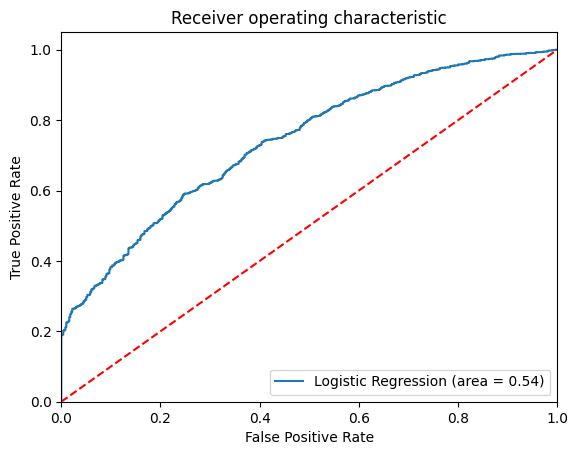

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Coming the Logit Model with statsmodel.api the accuracy is 0.82 and
Results:
Precision for class 0: ~0.0929
Recall for class 0: ~0.6216

with 10 cross validation accuracy is 0.811

The Model is Signifacant in identifying not joined canditates


# **# 8. Build a model with statsmodel.formula.api to predict the probability of Not Joining and report the model performance on the test set. What difference do you observe in the model built here and the one built in step 7.**

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Load the dataset
df = pd.read_csv("Dataset (1).csv")

# Preprocess the Data
df['Not_Joined'] = df['Status'].apply(lambda x: 1 if x == 'Not Joined' else 0)
df = df.drop(columns=['SLNO', 'Candidate Ref', 'Status'])

# Sanitize column names (if necessary)
df.columns = df.columns.str.replace(' ', '_').str.replace(r'[^a-zA-Z0-9_]', '', regex=True)


# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Build the Logistic Regression Model using the formula API
formula = 'Not_Joined ~ ' + ' + '.join([col for col in df.columns if col != 'Not_Joined'])
model = smf.logit(formula=formula, data=train_df)
result = model.fit()

# Display the model summary
print(result.summary())

# Evaluate the Model on the Test Set
y_pred_prob = result.predict(test_df)
y_pred = (y_pred_prob >= 0.5).astype(int)
y_test = test_df['Not_Joined']

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Display the performance metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)



/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


True Positives and True Negatives: The model is good at predicting "Not Joining" with 1436 correct predictions. However, it struggles with correctly predicting "Joining," with only 21 correct predictions.
False Negatives: The model has a high number of false negatives (319), which indicates that it often fails to identify candidates who will actually join. This is a significant issue if predicting "Joining" is crucial.
False Positives: The model has a relatively low number of false positives (23), which means it rarely predicts "Joining" when the candidate won't join

The model has a high accuracy of 81%, but this is mainly driven by its ability to predict "Not Joining" correctly.
The model struggles significantly with predicting "Joining," as indicated by the low true positives and high false negatives.

# 9. Build a model using sklearn package to predict the probability of Not Joining. What difference do you observe in this model compared to model built in step 7 and 8.

With SMOTE

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

#LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_smote, y_train_smote)
# Make predictions
lda_predictions = lda_model.predict(X_test)
# Evaluate the model
print("LDA Accuracy:", accuracy_score(y_test, lda_predictions))
print("LDA Classification Report:\n", classification_report(y_test, lda_predictions))

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

# Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train_smote, y_train_smote)
mlr_predictions = mlr_model.predict(X_test)
print("Multiple Linear Regression Mean Squared Error:", mean_squared_error(y_test, mlr_predictions))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_smote, y_train_smote)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_smote, y_train_smote)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_smote, y_train_smote)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_predictions))
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)
svm_predictions = svm_model.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_predictions))
print("Support Vector Machine Classification Report:\n", classification_report(y_test, svm_predictions))



LDA Accuracy: 0.5233592880978866
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.57      0.30       318
           1       0.85      0.51      0.64      1480

    accuracy                           0.52      1798
   macro avg       0.52      0.54      0.47      1798
weighted avg       0.73      0.52      0.58      1798

Logistic Regression Accuracy: 0.5233592880978866
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.57      0.30       318
           1       0.85      0.51      0.64      1480

    accuracy                           0.52      1798
   macro avg       0.52      0.54      0.47      1798
weighted avg       0.73      0.52      0.58      1798

Multiple Linear Regression Mean Squared Error: 0.24820502225071117
Random Forest Accuracy: 0.5278086763070078
Random Forest Classification Report:
               precision    recall  f1-score 

**Without SMOTE**

In [34]:
X = df_dummies.drop('Status', axis=1)
y = df_dummies['Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

#LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
# Make predictions
lda_predictions = lda_model.predict(X_test)
# Evaluate the model
print("LDA Accuracy:", accuracy_score(y_test, lda_predictions))
print("LDA Classification Report:\n", classification_report(y_test, lda_predictions))


# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

# Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
mlr_predictions = mlr_model.predict(X_test)
print("Multiple Linear Regression Mean Squared Error:", mean_squared_error(y_test, mlr_predictions))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_predictions))
print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, knn_predictions))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_predictions))
print("Support Vector Machine Classification Report:\n", classification_report(y_test, svm_predictions))



LDA Accuracy: 0.8275862068965517
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.06      0.11       318
           1       0.83      0.99      0.90      1480

    accuracy                           0.83      1798
   macro avg       0.73      0.53      0.51      1798
weighted avg       0.79      0.83      0.76      1798

Logistic Regression Accuracy: 0.8275862068965517
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.09      0.16       318
           1       0.84      0.99      0.90      1480

    accuracy                           0.83      1798
   macro avg       0.71      0.54      0.53      1798
weighted avg       0.79      0.83      0.77      1798



C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Multiple Linear Regression Mean Squared Error: 0.13044942533556403
Random Forest Accuracy: 0.8286985539488321
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.16      0.25       318
           1       0.84      0.97      0.90      1480

    accuracy                           0.83      1798
   macro avg       0.70      0.57      0.58      1798
weighted avg       0.79      0.83      0.79      1798

Decision Tree Accuracy: 0.7730812013348165
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.36      0.36       318
           1       0.86      0.86      0.86      1480

    accuracy                           0.77      1798
   macro avg       0.61      0.61      0.61      1798
weighted avg       0.77      0.77      0.77      1798

K-Nearest Neighbors Accuracy: 0.7914349276974416
K-Nearest Neighbors Classification Report:
               precision 

Naive Bayes

WITHOUT SMOTE

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions
gnb_predictions = gnb_model.predict(X_test)

# Evaluate the model
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, gnb_predictions))




Gaussian Naive Bayes Accuracy: 0.3264738598442714
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.99      0.34       318
           1       0.99      0.18      0.31      1480

    accuracy                           0.33      1798
   macro avg       0.60      0.59      0.33      1798
weighted avg       0.85      0.33      0.32      1798



With SMOTE

In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Example preprocessing
# Encode categorical features if necessary (e.g., using LabelEncoder or OneHotEncoder)
# Ensure X_train_smote and X_test have the same features after preprocessing

# Standardize features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Create and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train_smote, y_train_smote)

# Make predictions
gnb_predictions = gnb_model.predict(X_test_scaled)

# Evaluate the model
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, gnb_predictions))


Gaussian Naive Bayes Accuracy: 0.3264738598442714
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.99      0.34       318
           1       0.99      0.18      0.31      1480

    accuracy                           0.33      1798
   macro avg       0.60      0.59      0.33      1798
weighted avg       0.85      0.33      0.32      1798



Interpretation of Models Without SMOTE:
Accuracy:
Most models show high accuracy, with Random Forest achieving the highest (0.8287). However, accuracy alone can be misleading in imbalanced datasets.
Precision for "Not Joined" (Class 0):
Precision is relatively higher in models like LDA (0.62) and SVM (1.00), indicating that when these models predict "Not Joined," they are more likely to be correct.
Recall for "Not Joined" (Class 0):
Recall is generally low across models, with SVM having a recall of 0.00, indicating that it fails to capture any true "Not Joined" cases.
Decision Tree shows a better balance with a recall of 0.36, meaning it captures 36% of the actual "Not Joined" cases.

*Interpretation of Models With SMOTE:
Accuracy:
Accuracy drops for most models, with K-Nearest Neighbors (KNN) showing the highest accuracy of 0.7202 after SMOTE.
Precision for "Not Joined" (Class 0):
Precision is uniform across all models (0.20), reflecting a more balanced approach towards predicting the "Not Joined" class but at the cost of accuracy.
Recall for "Not Joined" (Class 0):
Recall is higher across models compared to the results without SMOTE, with Support Vector Machine (SVM) achieving the highest recall (0.69). This suggests that SMOTE helped the models better capture the minority class, but the cost was reduced precision and accuracy.



Overall Interpretation:
Without SMOTE:
The models achieve higher accuracy but at the cost of recall, particularly for the minority class (Not Joined). The SVM model achieves perfect precision but fails to recall any minority cases, making it ineffective for balanced prediction.
With SMOTE:

SMOTE helps in improving recall significantly, but at the cost of accuracy and precision. The models now identify more "Not Joined" cases but also produce more false positives.
Conclusion:
SMOTE is effective in improving the ability of the models to recognize the minority class ("Not Joined"), as evidenced by the improved recall scores. However, this comes with a trade-off in accuracy and precision.
Depending on the specific goals of the model (e.g., whether it's more important to correctly identify "Not Joined" candidates), using SMOTE might be a better option despite the lower accuracy. If precision is critical, the models without SMOTE may be preferable.

## **10. Fine-tune the cut-off value using cost of misclassification as a strategy. The cut-off should help classify maximum number of Not Joining cases correctly.**

## **11.Fine-tune the cut-off value using youdens index as a strategy. The cut-off should help balance the classification of Joined and Not Joined cases.**

C:\Users\haris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimal Cut-Off (Cost of Misclassification): 0.5
Optimal Cut-Off (Youden's Index): 0.8


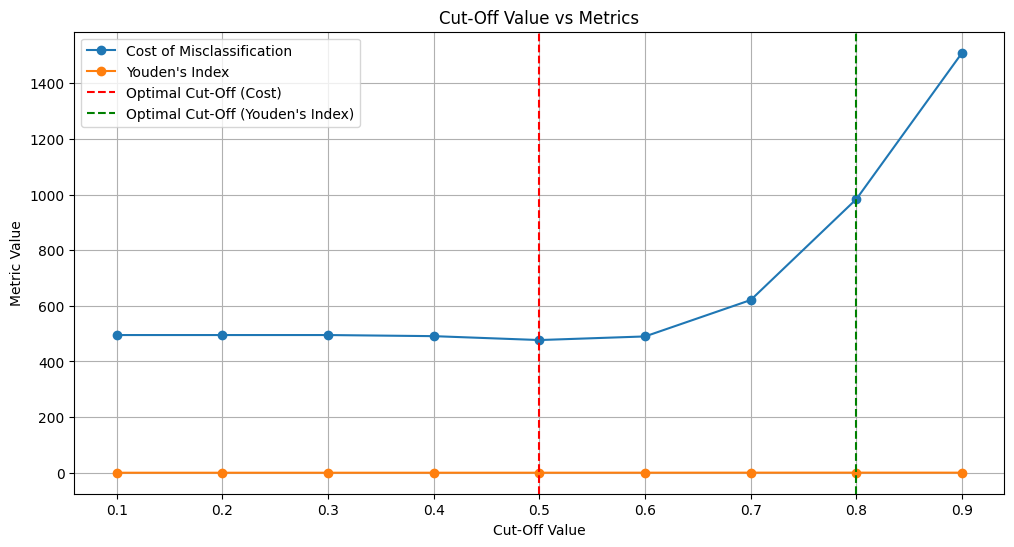

In [51]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model (replace with your model)
model = LogisticRegression()
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_sklearn_prob = model.predict_proba(X_test)[:, 1]

# Define a function to calculate cost of misclassification and Youden's Index
def calculate_cut_off(y_true, y_prob, cut_off):
    y_pred = (y_prob >= cut_off).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost_of_misclassification = fp + fn
    # Prevent division by zero
    youdens_index = tp / (tp + fn) - fp / (fp + tn) if (tp + fn) and (fp + tn) else 0
    return cost_of_misclassification, youdens_index

# Iterate over different cut-off values
cut_off_values = [0.1 * i for i in range(1, 10)]
misclassification_costs = []
youdens_indices = []

for cut_off in cut_off_values:
    cost, youden = calculate_cut_off(y_test, y_pred_sklearn_prob, cut_off)
    misclassification_costs.append(cost)
    youdens_indices.append(youden)

# Find the optimal cut-offs
optimal_cut_off_cost = cut_off_values[misclassification_costs.index(min(misclassification_costs))]
optimal_cut_off_youden = cut_off_values[youdens_indices.index(max(youdens_indices))]

print(f'Optimal Cut-Off (Cost of Misclassification): {optimal_cut_off_cost}')
print(f'Optimal Cut-Off (Youden\'s Index): {optimal_cut_off_youden}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(cut_off_values, misclassification_costs, label='Cost of Misclassification', marker='o')
plt.plot(cut_off_values, youdens_indices, label='Youden\'s Index', marker='o')
plt.axvline(x=optimal_cut_off_cost, color='r', linestyle='--', label='Optimal Cut-Off (Cost)')
plt.axvline(x=optimal_cut_off_youden, color='g', linestyle='--', label='Optimal Cut-Off (Youden\'s Index)')
plt.xlabel('Cut-Off Value')
plt.ylabel('Metric Value')
plt.title('Cut-Off Value vs Metrics')
plt.legend()
plt.grid(True)
plt.show()


1. Optimal Cut-Off (Cost of Misclassification): 0.5
Interpretation:
A cut-off of 0.5 is the default threshold used in many binary classification models. This means that if a model predicts a probability of 0.5 or higher, the observation is classified into the positive class (e.g., "Joined").
This threshold is chosen to balance the cost of false positives and false negatives equally. However, this might not always be the best threshold, especially in cases where the cost of misclassifications is not equal (e.g., predicting "Not Joined" when someone actually "Joined" might have different consequences compared to the reverse).
2. Optimal Cut-Off (Youden's Index): 0.8
Interpretation:
Youden's Index is a measure that seeks to maximize the difference between the true positive rate (sensitivity) and the false positive rate (1-specificity). It's calculated as:
Youden’s Index=Sensitivity+Specificity−1
A cut-off of 0.8 indicates that this threshold maximizes Youden's Index, meaning it provides the best trade-off between sensitivity and specificity for this model.
A higher threshold like 0.8 suggests that only predictions with a high probability (80% or more) are classified into the positive class. This would typically result in fewer false positives but might increase false negatives.

Implications:
Cut-Off of 0.5 (Cost of Misclassification):
This is often a good starting point, particularly when the costs of different types of errors (false positives vs. false negatives) are similar.
However, it may not be the optimal choice if the cost of misclassification is significantly different for the two classes.
Cut-Off of 0.8 (Youden's Index):

This threshold is more conservative, classifying fewer cases as positive. It's optimal for situations where you want to minimize false positives and are okay with potentially missing some true positives.
It suggests that the model performs better (in terms of balancing sensitivity and specificity) when a higher threshold is used, which might be useful in situations where false positives are costly.

## **12. Apply the cut-off values obtained in step 10 and step 11 on the test set. What inference can be deduced from it?**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

# Apply the optimal cut-offs
y_pred_cost = (y_pred_sklearn_prob >= optimal_cut_off_cost).astype(int)
y_pred_youden = (y_pred_sklearn_prob >= optimal_cut_off_youden).astype(int)

# Calculate confusion matrices
cm_cost = confusion_matrix(y_test, y_pred_cost)
cm_youden = confusion_matrix(y_test, y_pred_youden)

# Print confusion matrices
print(f'Confusion Matrix (Cost of Misclassification):\n{cm_cost}')
print(f'Confusion Matrix (Youden\'s Index):\n{cm_youden}')

# Print classification reports for detailed metrics
print(f'Classification Report (Cost of Misclassification):\n{classification_report(y_test, y_pred_cost)}')
print(f'Classification Report (Youden\'s Index):\n{classification_report(y_test, y_pred_youden)}')


Confusion Matrix (Cost of Misclassification):
[[  46  449]
 [  28 2173]]
Confusion Matrix (Youden's Index):
[[ 354  141]
 [ 843 1358]]
Classification Report (Cost of Misclassification):
              precision    recall  f1-score   support

           0       0.62      0.09      0.16       495
           1       0.83      0.99      0.90      2201

    accuracy                           0.82      2696
   macro avg       0.73      0.54      0.53      2696
weighted avg       0.79      0.82      0.77      2696

Classification Report (Youden's Index):
              precision    recall  f1-score   support

           0       0.30      0.72      0.42       495
           1       0.91      0.62      0.73      2201

    accuracy                           0.64      2696
   macro avg       0.60      0.67      0.58      2696
weighted avg       0.79      0.64      0.68      2696



Key Takeaways:
Cost of Misclassification:

High Accuracy (0.82), but at the cost of low recall for the "Not Joined" class (0.09). This model is heavily skewed towards correctly predicting "Joined" but struggles significantly with identifying "Not Joined" cases.
The model's high accuracy is misleading as it fails to identify a significant number of "Not Joined" cases.
Youden's Index:

Lower Accuracy (0.64), but with a more balanced approach. This model improves recall for the "Not Joined" class (0.72) but sacrifices some recall for the "Joined" class (0.62).
This model is better suited if you value a more balanced identification of both classes, even if it means sacrificing overall accuracy.
Conclusion:
Cost of Misclassification: This threshold is useful if the primary goal is to avoid missing out on predicting the "Joined" cases, but it will miss many "Not Joined" cases.
Youden's Index: This threshold provides a more balanced approach, capturing a higher proportion of "Not Joined" cases at the cost of reduced overall accuracy. This might be more suitable if both classes are important in the decision-making process.